# SALES ANALYSIS

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import calendar

In [2]:
##Importing all months dataset and concatinate them

In [3]:
files=[file for file in os.listdir('/Users/vanshikasharma/Desktop/Jupyter Notebook/Sales_Data/')] 
all_files_data=pd.DataFrame() 
for file in files:    
    df=pd.read_csv("/Users/vanshikasharma/Desktop/Jupyter Notebook/Sales_Data/"+file)     
    all_files_data = pd.concat([all_files_data, df], ignore_index=True)  
all_files_data.to_csv("all_files_data.csv",index=False)

In [4]:
sales_df=pd.read_csv("all_files_data.csv")
sales_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [5]:
#Handling missing values
sales_df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
#droping missing values
sales_df.dropna(subset=['Order ID'],inplace=True)

In [7]:
sales_df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [8]:
#Handling Data types
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


##Changing Order ID ---> int , Quantity Ordered --->int , Price each ---> float , Order Date ----> Datetime

In [9]:
sales_df['Order ID']=pd.to_numeric(sales_df['Order ID'],errors='coerce')
sales_df['Order ID']=sales_df['Order ID'].astype('Int64')

sales_df['Quantity Ordered']=pd.to_numeric(sales_df['Quantity Ordered'],errors='coerce')
sales_df['Quantity Ordered']=sales_df['Quantity Ordered'].astype('Int64')

sales_df['Price Each']=pd.to_numeric(sales_df['Price Each'],errors='coerce')

sales_df['Order Date']=pd.to_datetime(sales_df['Order Date'],format ="%m/%d/%y %H:%M",errors='coerce' )

In [10]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  Int64         
 1   Product           186305 non-null  object        
 2   Quantity Ordered  185950 non-null  Int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
dtypes: Int64(2), datetime64[ns](1), float64(1), object(2)
memory usage: 10.3+ MB


In [11]:
sales_df.isnull().sum()

Order ID            355
Product               0
Quantity Ordered    355
Price Each          355
Order Date          355
Purchase Address      0
dtype: int64

In [12]:
#Droping Order ID columns
#sales_df.drop(columns=['Order ID'],inplace=True)

In [13]:
sales_df.dropna(subset=['Quantity Ordered','Price Each','Order Date'],inplace=True)

In [14]:
sales_df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

.

### Question 1-Which is the best month for sales ? And how much was earned in that month

In [15]:
#Extracting month from date for month-wise analysis

In [16]:
sales_df['Sales Month']=sales_df['Order Date'].dt.month_name().str[:3]

In [17]:
#Creating a total sale column using Quantity and Price of each

In [18]:
sales_df['Total Sales']=sales_df['Quantity Ordered']*sales_df['Price Each']
sales_df['Total Sales'] = sales_df['Total Sales'].astype('float64')

In [19]:
#finding best month
sales_by_month=sales_df.groupby('Sales Month').sum('Total Sales').reset_index()

/var/folders/m9/c2d1d_mj2498cks2v5q2fgz40000gn/T/ipykernel_98350/3672398368.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sales_by_month,x='Sales Month',y='Total Sales',palette='viridis',order=month_order)


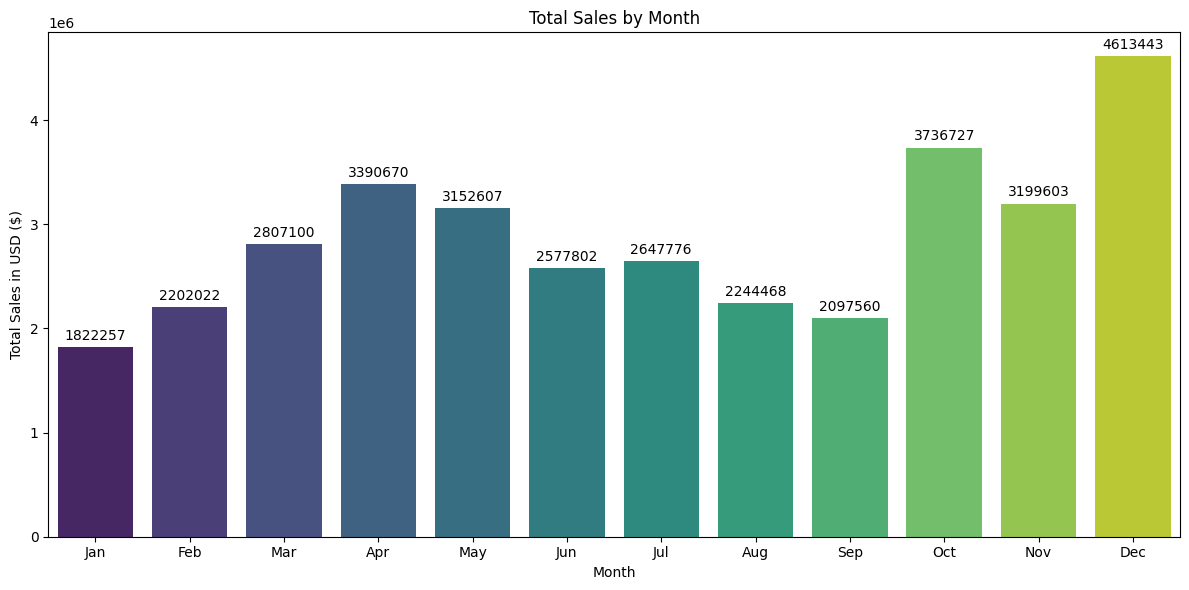

In [20]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(12,6))
ax = sns.barplot(data=sales_by_month,x='Sales Month',y='Total Sales',palette='viridis',order=month_order)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales in USD ($)')
plt.tight_layout()
plt.show()

#### Observation:: Dec month is best for sales with highest sales of 4613443 USD and Jan has lowest sales of 1822257 USD

### Question 2: Which US city has the highest sales

In [21]:
sales_df['Purchase Address']

0         136 Church St, New York City, NY 10001
1            562 2nd St, New York City, NY 10001
2           277 Main St, New York City, NY 10001
3            410 6th St, San Francisco, CA 94016
4                  43 Hill St, Atlanta, GA 30301
                           ...                  
186845             795 Pine St, Boston, MA 02215
186846     495 North St, New York City, NY 10001
186847     319 Ridge St, San Francisco, CA 94016
186848      916 Main St, San Francisco, CA 94016
186849            209 11th St, Atlanta, GA 30301
Name: Purchase Address, Length: 185950, dtype: object

In [22]:
#Using .apply() and string function to extract city from Purchase Address 
def get_city(address):
    return address.strip().split(',')[1]

def get_state(address):
    return address.strip().split(',')[2].split(' ')[1]
    
sales_df['City']=sales_df['Purchase Address'].apply(lambda x: f"{get_city(x)} {get_state(x)}")

In [23]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales Month,Total Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",Dec,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",Dec,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",Dec,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",Dec,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",Dec,11.95,Atlanta GA


In [24]:
sales_by_city=sales_df.groupby('City').sum('Total Sales').reset_index()
sales_by_city

,City,Order ID,Quantity Ordered,Price Each,Total Sales
0,Atlanta GA,3423838407,16602,2779908.20,2795498.58
1,Austin TX,2280982185,11153,1809873.61,1819581.75
2,Boston MA,4598265261,22528,3637409.77,3661642.01
3,Dallas TX,3415643578,16730,2752627.82,2767975.40
4,Los Angeles CA,6811084693,33289,5421435.23,5452570.80
5,New York City NY,5736333884,27932,4635370.83,4664317.43
6,Portland ME,563266345,2750,447189.25,449758.27
7,Portland OR,2305594747,11303,1860558.22,1870732.34
8,San Francisco CA,10304443952,50239,8211461.74,8262203.91
9,Seattle WA,3406693974,16553,2733296.01,2747755.48


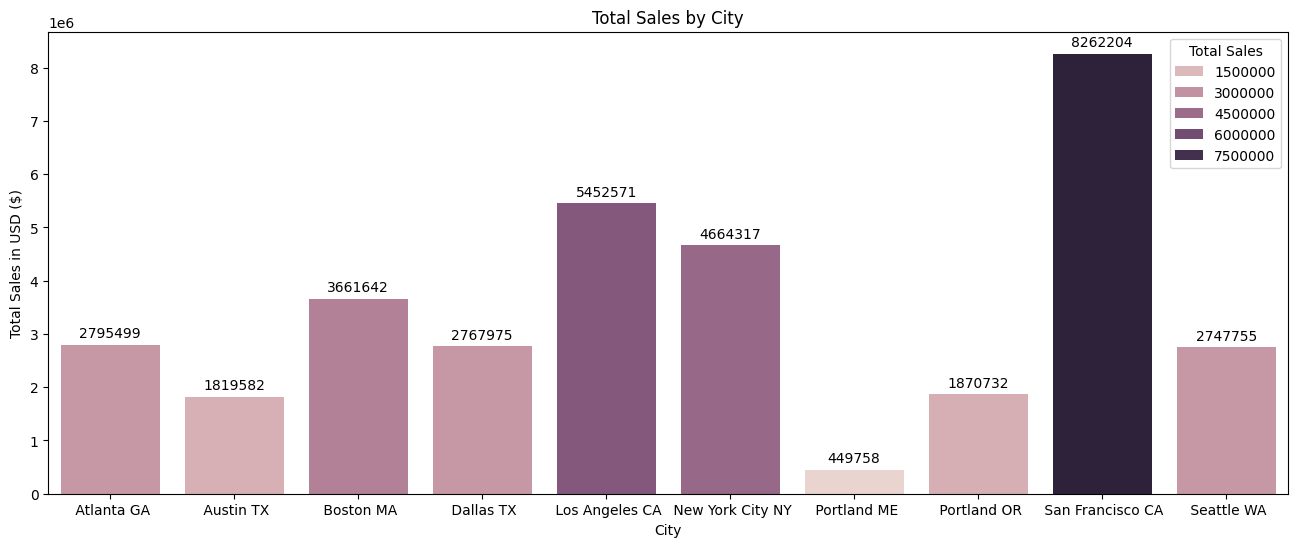

In [25]:
#Visualizing Total Sales by City
plt.figure(figsize=(16,6))
ax=sns.barplot(sales_by_city,x='City',y='Total Sales',hue='Total Sales')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.title("Total Sales by City")
plt.xlabel('City')
plt.ylabel('Total Sales in USD ($)')
plt.show()

#### Obseravtion : San Francisco CA has the largest sale of 8262204 USD and Portland ME has lowest 449758

### Question 3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [26]:
#Extracting hours from the Order date column
sales_df['Hours']=sales_df['Order Date'].dt.hour

In [27]:
order_placing_hours=sales_df.groupby('Hours')['Total Sales'].count().reset_index(name='Order Count')

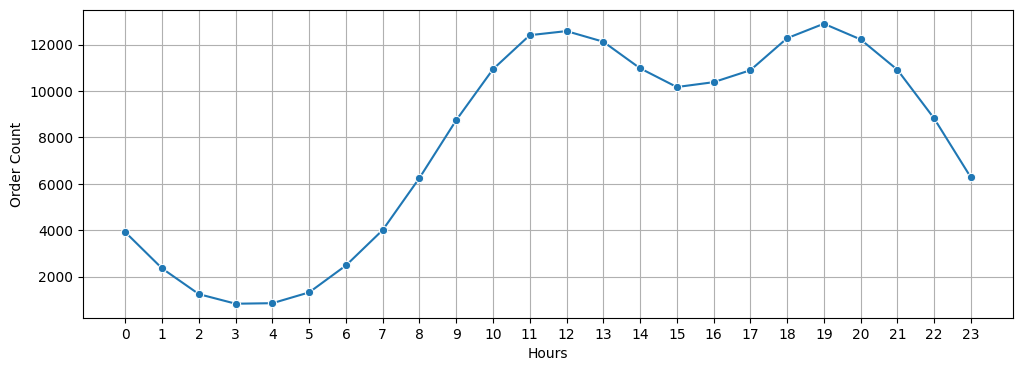

,Hours,Order Count,pct
0,0,3910,2.102716
1,1,2350,1.263781
2,2,1243,0.668459
3,3,831,0.446894
4,4,854,0.459263
5,5,1321,0.710406
6,6,2482,1.334767
7,7,4011,2.157031
8,8,6256,3.364345
9,9,8748,4.704490


In [28]:
#Plotting a line graph to understand pattern
hours=[hour  for hour,df in sales_df.groupby('Hours')]
order_placing_hours['pct'] = order_placing_hours['Order Count']/order_placing_hours['Order Count'].sum()*100
order_placing_hours.sort_values('Hours', inplace=True)
plt.figure(figsize=(12,4))
plt.xticks(hours)
sns.lineplot(data=order_placing_hours, x='Hours', y='Order Count', marker='o')
plt.grid()
plt.show()
order_placing_hours

#### Observation : The highest number of orders are placed between 11 AM and 7 PM, indicating that customer activity peaks during late 
#### morning to evening hours.With highest peaks at 12 noon, 1pm,6pm and 7pm.

### Question 4 : What product sold the most? and Why?

In [29]:
sales_df['Quantity Ordered']=sales_df['Quantity Ordered'].astype(int)
most_sold_product=sales_df.groupby('Product').agg( UnitsSold=('Quantity Ordered','sum'), TotalRevenue=('Total Sales','sum'), 
                                                  AvgPrice=('Price Each','mean')).sort_values('UnitsSold', ascending=False).reset_index()
most_sold_product

,Product,UnitsSold,TotalRevenue,AvgPrice
0,AAA Batteries (4-pack),31017,92740.83,2.99
1,AA Batteries (4-pack),27635,106118.40,3.84
2,USB-C Charging Cable,23975,286501.25,11.95
3,Lightning Charging Cable,23217,347094.15,14.95
4,Wired Headphones,20557,246478.43,11.99
5,Apple Airpods Headphones,15661,2349150.00,150.00
6,Bose SoundSport Headphones,13457,1345565.43,99.99
7,27in FHD Monitor,7550,1132424.50,149.99
8,iPhone,6849,4794300.00,700.00
9,27in 4K Gaming Monitor,6244,2435097.56,389.99


/var/folders/m9/c2d1d_mj2498cks2v5q2fgz40000gn/T/ipykernel_98350/4237202924.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


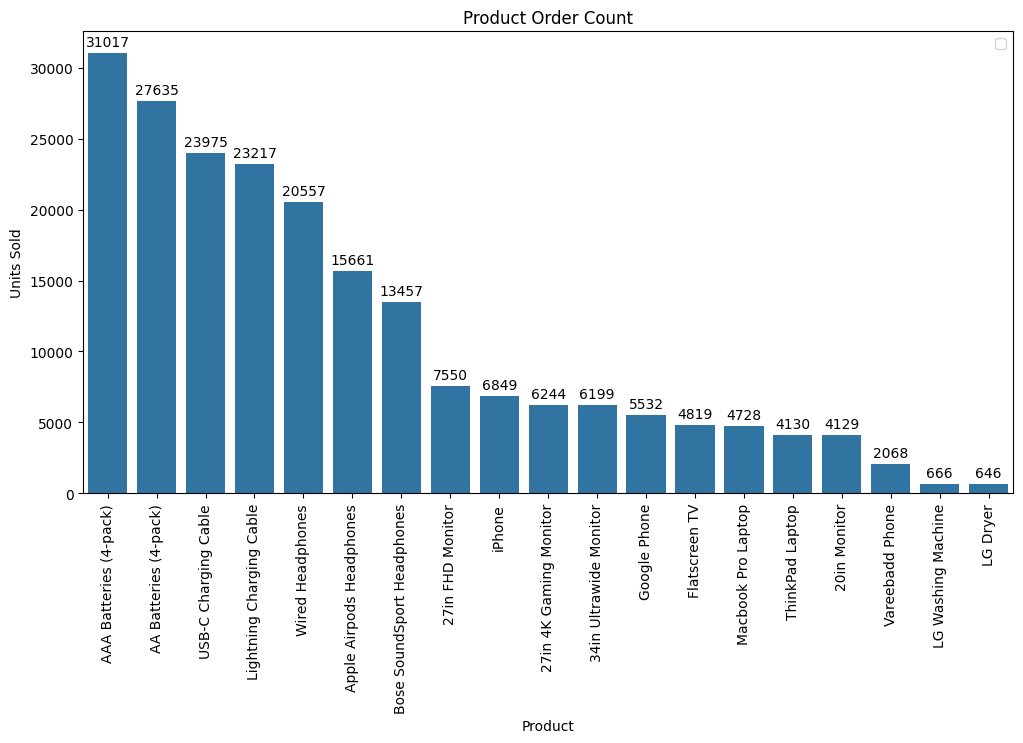

In [30]:
#visualising
plt.figure(figsize=(12,6))
ax=sns.barplot(data=most_sold_product,x='Product',y='UnitsSold')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.title('Product Order Count')
plt.xlabel('Product')
plt.ylabel("Units Sold")
plt.xticks(most_sold_product['Product'],rotation='vertical')
plt.legend()
plt.show()


#### Observation : AAA Batteries(4-pack) sold the most with 31017 units

In [31]:
#To know why AAA Batteries(4-pack) sold the most we check its relation with price of single unit
most_sold_product[['Product','AvgPrice']]

,Product,AvgPrice
0,AAA Batteries (4-pack),2.99
1,AA Batteries (4-pack),3.84
2,USB-C Charging Cable,11.95
3,Lightning Charging Cable,14.95
4,Wired Headphones,11.99
5,Apple Airpods Headphones,150.00
6,Bose SoundSport Headphones,99.99
7,27in FHD Monitor,149.99
8,iPhone,700.00
9,27in 4K Gaming Monitor,389.99


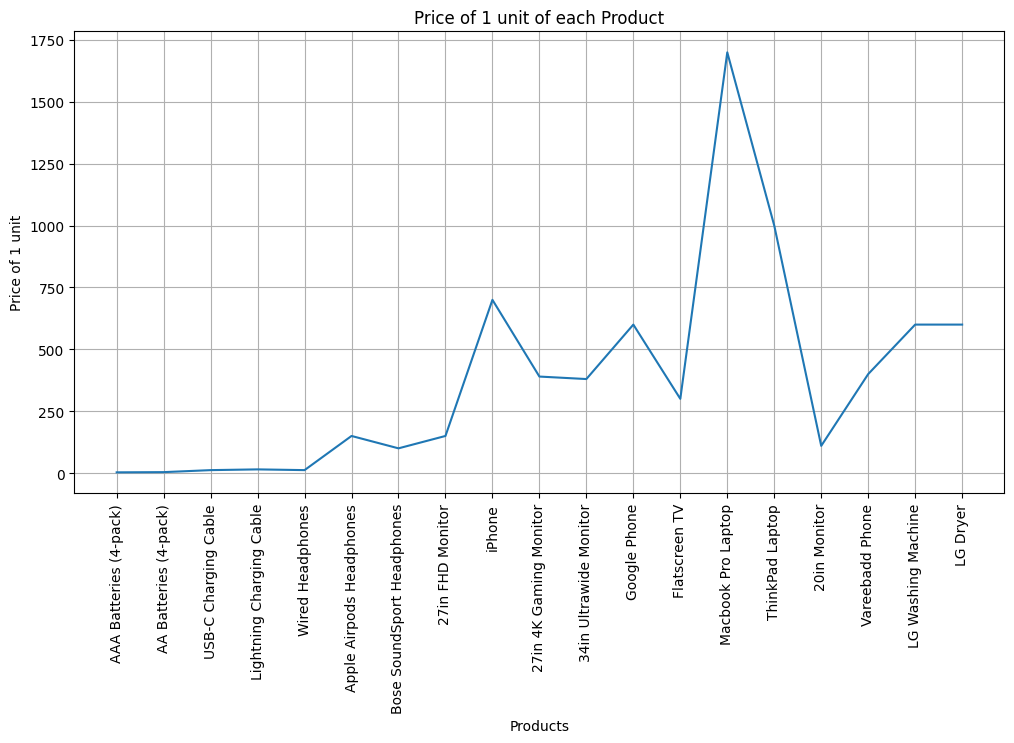

In [32]:
plt.figure(figsize=(12,6))
sns.lineplot(data=most_sold_product,x='Product',y='AvgPrice')
plt.title('Price of 1 unit of each Product')
plt.xlabel('Products')
plt.ylabel('Price of 1 unit')
plt.xticks(most_sold_product['Product'],rotation='vertical')
plt.grid()
plt.show()

In [33]:
sales_df[['Quantity Ordered','Price Each','Total Sales']].corr()

,Quantity Ordered,Price Each,Total Sales
Quantity Ordered,1.000000,-0.148272,-0.139417
Price Each,-0.148272,1.000000,0.999203
Total Sales,-0.139417,0.999203,1.000000


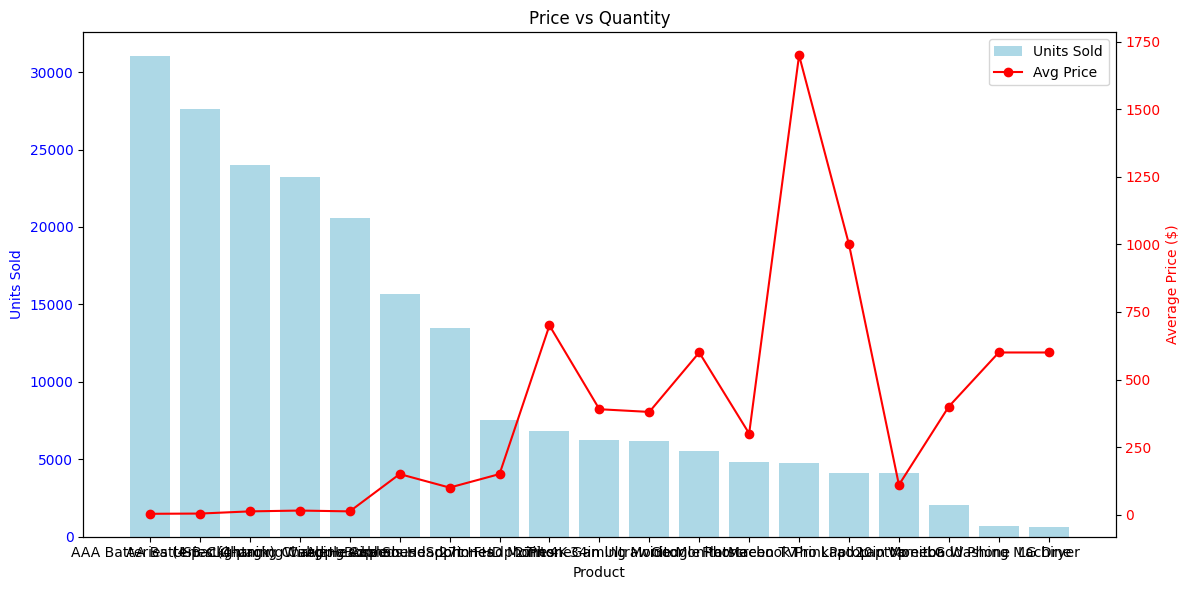

In [34]:
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar chart for Units Sold
ax1.bar(most_sold_product['Product'],
        most_sold_product['UnitsSold'],
        color='lightblue', label='Units Sold')
ax1.set_xlabel('Product')
ax1.set_ylabel('Units Sold', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line chart for Average Price
ax2 = ax1.twinx()
ax2.plot(most_sold_product['Product'],
         most_sold_product['AvgPrice'],
         color='red', marker='o', label='Avg Price')
ax2.set_ylabel('Average Price ($)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and rotated x-axis labels
plt.title('Price vs Quantity')
plt.xticks(rotation=90, ha='center')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()

#### Observation : Reason why AAA batteries(4 pack) is most sold because it cost very less 2.99 USD

## Question 5 : What is the average order value (AOV) per city and how does it change over time?

In [35]:
# get order totals and order city/month
order_totals = sales_df.groupby('Order ID').agg(
    OrderTotal=('Total Sales','sum'),
    City=('City','first'),
    OrderDate=('Order Date','first')
).reset_index()
order_totals['Month'] = order_totals['OrderDate'].dt.month
order_totals['MonthName'] = order_totals['OrderDate'].dt.strftime('%b')

aov_city_month = order_totals.groupby(['Month','MonthName','City']).OrderTotal.mean().reset_index()
# sort by month before plotting
aov_city_month = aov_city_month.sort_values('Month')

aov_city_month


,Month,MonthName,City,OrderTotal
0,1,Jan,Atlanta GA,199.144913
1,1,Jan,Austin TX,172.719725
2,1,Jan,Boston MA,201.088490
3,1,Jan,Dallas TX,190.016570
4,1,Jan,Los Angeles CA,196.061073
...,...,...,...,...
114,12,Dec,Los Angeles CA,182.509296
115,12,Dec,New York City NY,198.213555
116,12,Dec,Portland ME,169.270586
117,12,Dec,Portland OR,196.218270


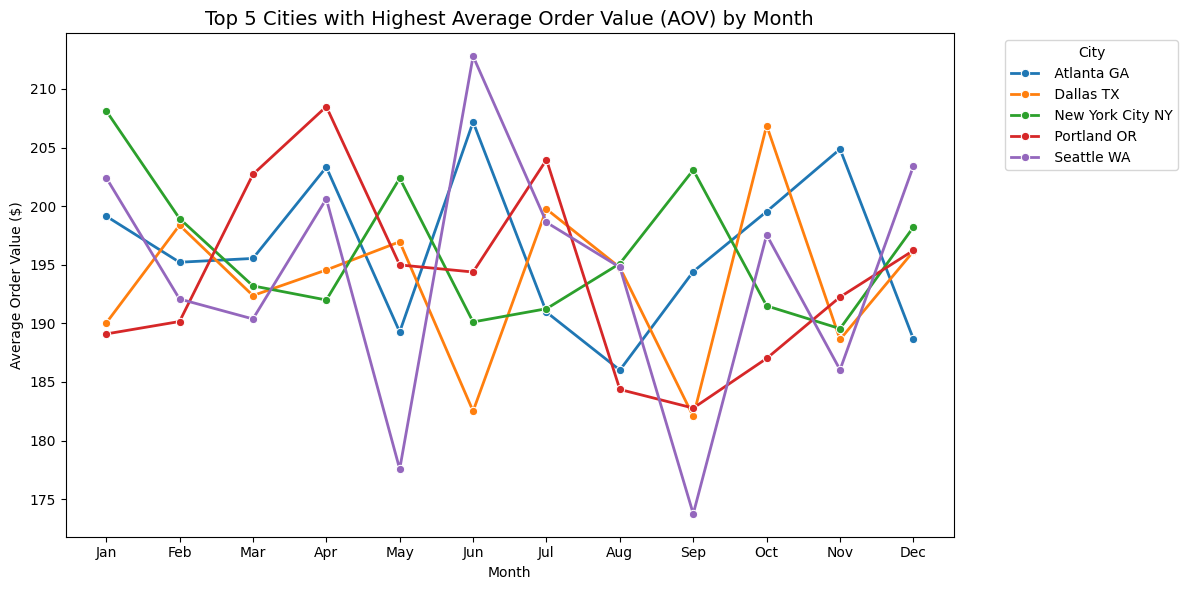

In [36]:
top_aov_cities = (order_totals.groupby('City')['OrderTotal'].mean().sort_values(ascending=False).head().index)

subset = aov_city_month[aov_city_month['City'].isin(top_aov_cities)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=subset, x='MonthName', y='OrderTotal', hue='City', marker='o', linewidth=2)
plt.title("Top 5 Cities with Highest Average Order Value (AOV) by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Average Order Value ($)")
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Question : 6 How does the sales mix (product preferences) differ between cities?

In [37]:
city_product_sales=sales_df.groupby(['City','Product'])['Total Sales'].sum().reset_index()

In [38]:
city_total_sales = city_product_sales.groupby('City')['Total Sales'].transform('sum')
city_product_sales['Sales %'] = (city_product_sales['Total Sales'] / city_total_sales) * 100

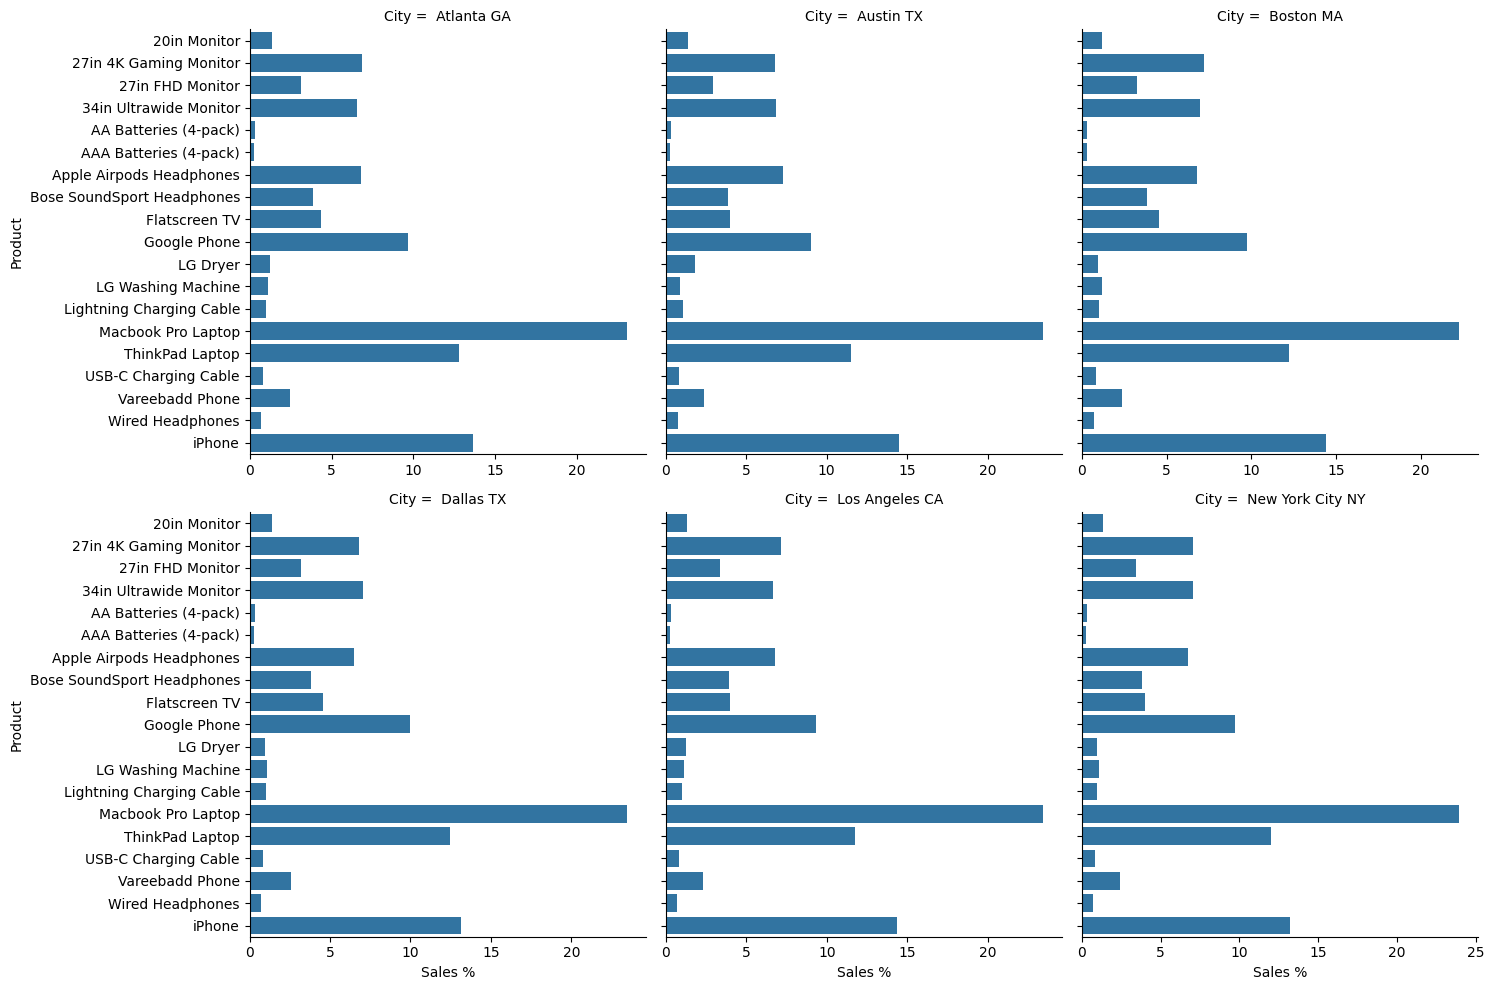

In [39]:
#visualization of Top 6 Cities Product preferences.
top_cities = sales_by_city.head(6)['City']  
subset = city_product_sales[city_product_sales['City'].isin(top_cities)]
g = sns.catplot(data=subset, kind='bar', x='Sales %', y='Product', col='City', col_wrap=3, sharex=False)

#### Observation : Macbook Pro laptop contribution to total revenue is highest (24.89%\) desipte lower unit sales because of high avg price.

## Recommendation 

#### 1. Peak Sales Months  
December recorded the highest total sales of **$4,613,443**, followed by **October ($3,736,727)** and **April ($3,390,670)**.  
To meet increased demand during these peak periods, **inventory levels and supply chain management should be strengthened**.

---

#### 2. Top-Performing Markets  
**San Francisco, CA** and **Los Angeles, CA** represent the largest markets, with total sales of **$8,262,203.91** and **$5,452,570.80**, respectively.  
These cities offer **significant growth potential** and should be prioritized for **marketing and logistics optimization**.

---

#### 3. Optimal Advertising Hours  
Customer activity peaks between **11 AM and 7 PM**, with noticeable surges at **12 PM, 1 PM, 6 PM, and 7 PM**.  
To maximize engagement and conversion rates, **advertising campaigns should be scheduled during these hours**.

---

#### 4. High-Volume, Low-Cost Products  
**AAA Batteries (4-pack)** and **AA Batteries (4-pack)** have the highest units sold, primarily due to their **low price point of $2.99**, making them **popular impulse or add-on purchases**.

---

#### 5. City-Wise AOV Variation  
**Seattle** and **New York City** show the greatest variability in **Average Order Value (AOV)**, with spikes during **May–June** and **October–November**.  
This suggests possible **seasonal promotions or changing product preferences** driving variations in spending behavior.

---

#### 6. Revenue Contribution by Product  
The **MacBook Pro** generates the **highest total revenue**, despite lower sales volume, due to its **high average price**.  
Following it, **iPhone** and **ThinkPad** contribute significantly to overall revenue.

---


In [41]:
sales_df.to_csv("Cleaned Sales Data.csv",index=False)